# Módulo 14: Scripting I
# Exercício 1: Gráficos


Digite o mês desejado (no formato 'MM'): 12
2019-12


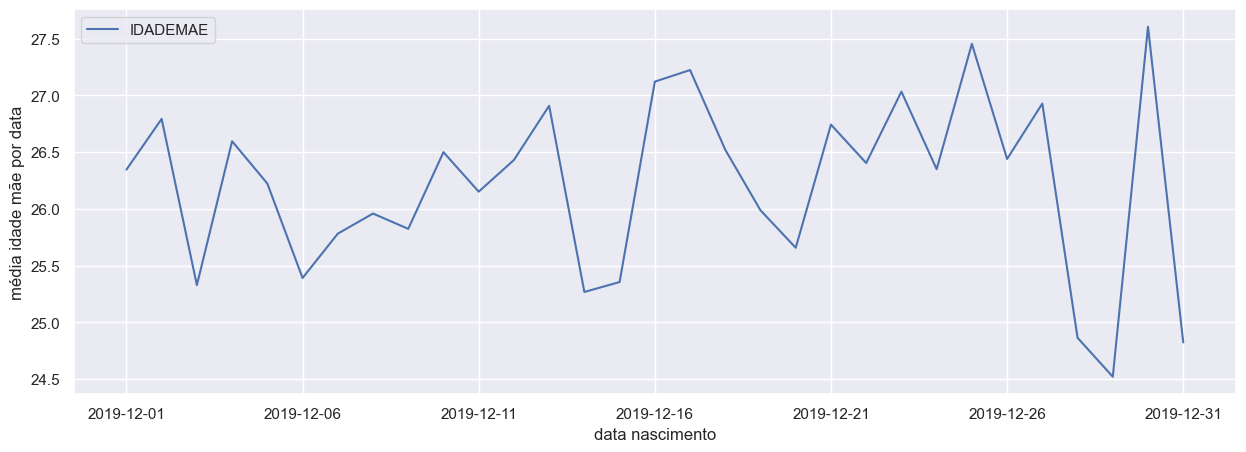

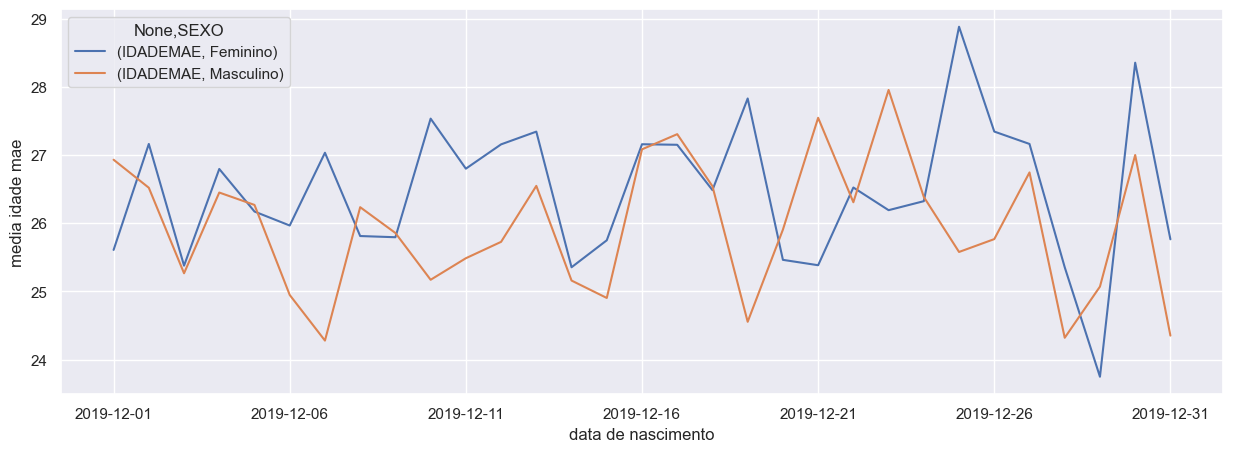

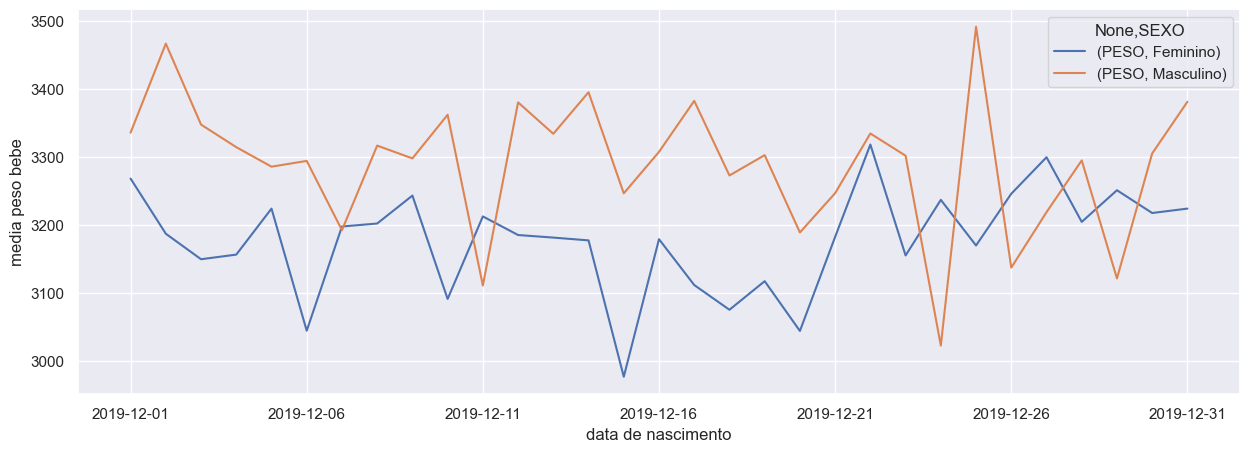

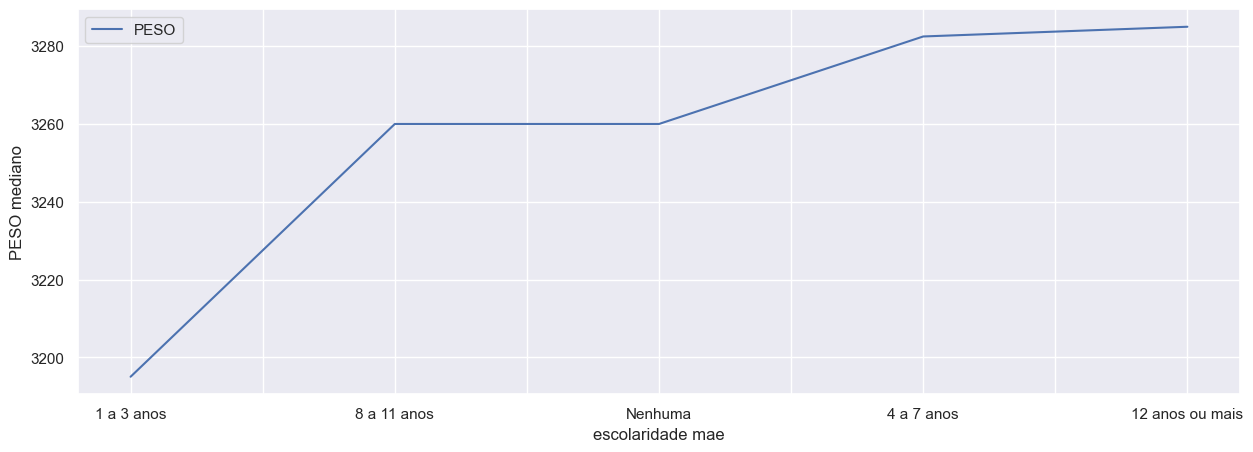

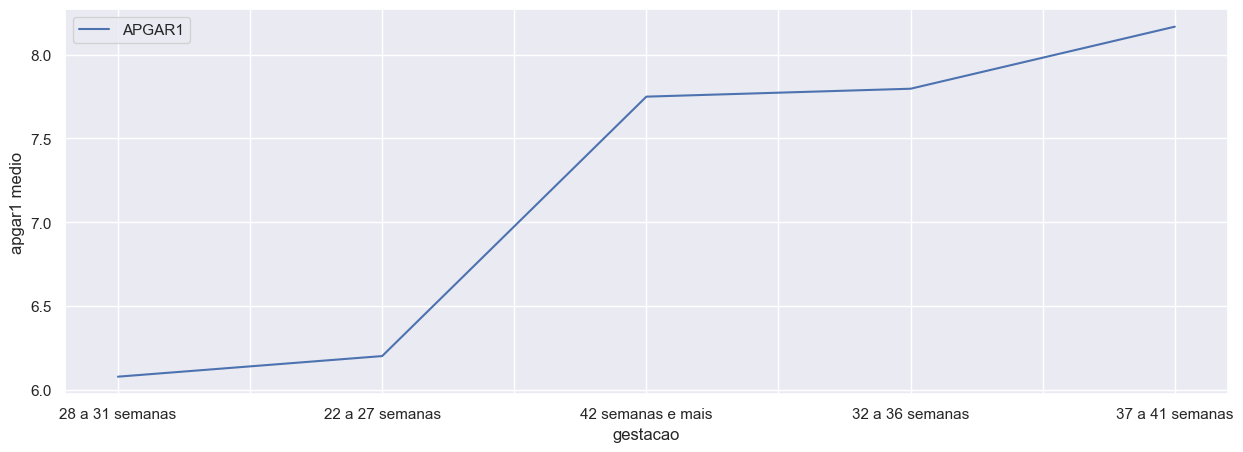

In [16]:
# importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()  


# função para plotar pivot table
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# carregando o dataFrame
sinasc = pd.read_csv('./input/SINASC_RO_2019.csv')


# Solicitar o mês desejado do usuário
mes_desejado = input("Digite o mês desejado (no formato 'MM'): ")

# Filtrar os dados para o mês desejado
sinasc = sinasc[sinasc['DTNASC'].str.contains(f'2019-{mes_desejado}')]

# pegando a maior data com os 7 primeiros caracteres
max_data = sinasc.DTNASC.max()[:7]
print(max_data)


# setando o caminho para salvar arquivos
output_dir = f'./output/figs/{max_data}/{mes_desejado}'
os.makedirs('./output/figs/'+max_data, exist_ok=True)


# chamando a função para todos os cenários e os salvando
plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
plt.savefig('./output/figs/'+max_data+'/media idade mae por data.png')

plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
plt.savefig('./output/figs/'+max_data+'/PESO mediano por escolaridade mae.png')

plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

In [17]:
# Como deixar este processo mais automatizado?
# Resposta: Fazendo um input para que o usuário digite o mês e guardando está informação em uma variável. 
# Depois fazer um filtro com a variável para selecionar informações que tenham o mês digitado. Dessa forma 
# não seria mais necessários seccionar o dataFrame com os respectivos meses, o que de certa forma é contraproducente.